# WeatherPy
1) The plots showcasing the latitudes vs the maximum temperatures with the regression lines show that it is possible to predict temperatures based on latitudes. Temperatures rise as the latitudes reach the equator (0). The northern hemisphere shows a negative regression due to the fact the temperatures drop moving away from the equator.  
2) The plots showcasing humidity tends to show that humidity is not relative to latitudes as one might expect. The r-squared value is very low, leading to the conclusion the value of humidity cannot be predicted based on location of the city.  
3) Similiarly the plots showcasing cloudiness also have a low r-squared value. The location of the city also cannot predict the value of cloudiness.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 
import datetime as dt  

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

19


### API Calls
* Perform a weather check on each city using a series of successive API calls
* Print log of each city as it's being processed


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found... Skipping.")

Processing record 1|faanui
Processing record 2|djibo
Processing record 3|bluff
Processing record 4|rikitea
Processing record 5|riyadh
Processing record 6|mazzarino
Processing record 7|busselton
Processing record 8|srednekolymsk
Processing record 9|khatanga
Processing record 10|nome
Processing record 11|barrow
Processing record 12|castro
Processing record 13|tirat karmel
Processing record 14|vaini
Processing record 15|atuona
Processing record 16|ribeira grande
City not found... Skipping.
Processing record 17|tahoua
Processing record 18|torbay


### Create dataframe of cities

In [4]:
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
#rename axis
city_df = city_df.rename_axis('City ID')

#Exporting data to csv
city_df.to_csv("../output_data/city.csv")

#Displaying dataframe
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Faanui,53,PF,1619912232,66,-16.4833,-151.7500,80.74,2.86
1,Djibo,0,BF,1619912233,17,14.1022,-1.6306,89.64,8.61
2,Bluff,60,NZ,1619912233,76,-46.6000,168.3333,55.99,5.99
3,Rikitea,93,PF,1619911979,80,-23.1203,-134.9692,75.67,8.52
4,Riyadh,0,SA,1619912233,22,24.6877,46.7219,78.80,3.44
5,Mazzarino,20,IT,1619912233,64,37.3043,14.2141,68.00,8.05
6,Busselton,5,AU,1619911998,97,-33.6500,115.3333,55.00,1.01
7,Srednekolymsk,10,RU,1619912234,78,67.4500,153.6833,28.65,7.40
8,Khatanga,62,RU,1619912234,92,71.9667,102.5000,25.12,2.98


In [5]:
#Check data
city_df.count()

City          18
Cloudiness    18
Country       18
Date          18
Humidity      18
Lat           18
Lng           18
Max Temp      18
Wind Speed    18
dtype: int64

## Plotting the Data

In [6]:
#Find date of analysis

date = dt.datetime.today().strftime("%m/%d/%Y")
#date

## Latitude vs. Temperature Plot
Looks at how the latitude of the city impacts the maximum temperature

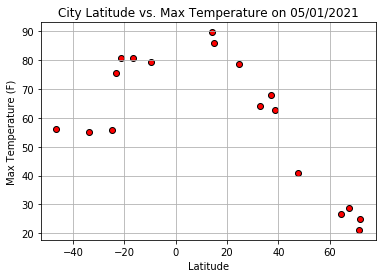

In [7]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "red",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature on {date}")
plt.savefig("../output_data/Lat_vs_temp_plot")

## Latitude vs. Humidity Plot
Looks at how the latitude of the city impacts the humidity percentage level

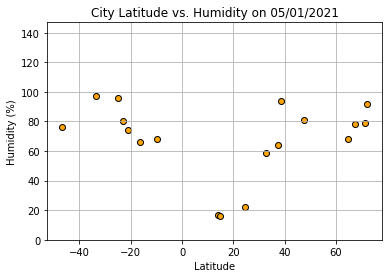

In [8]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "orange",edgecolor = "black")
plt.grid()
plt.ylim(0, city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity on {date}")
plt.savefig("../output_data/plot_lat_vs_hum")

## Latitude vs. Cloudiness Plot
Looks at how the latitude of the city impacts the percentage of cloudiness

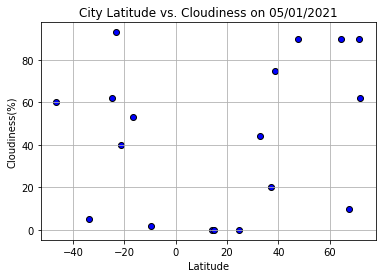

In [9]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness on {date}")
plt.savefig("../output_data/plot_lat_vs_clouds")

## Latitude vs. Wind Speed Plot
Looks at how the latitude of the city impacts the wind speed

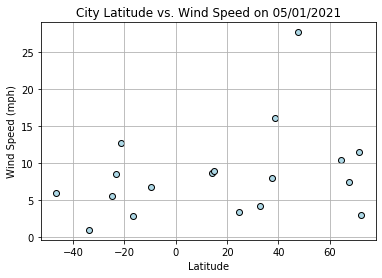

In [10]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "lightblue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed on {date}")
plt.savefig("../output_data/plot_lat_windspeed")

## Linear Regression

In [11]:
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")

In [12]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_df.loc[city_df["Lat"]>0]
Southern_hemisphere = city_df.loc[city_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9873661473882139
None


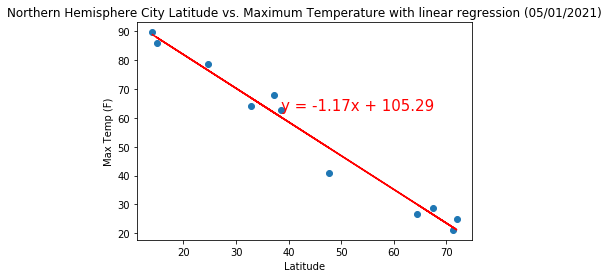

In [13]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title(f"Northern Hemisphere City Latitude vs. Maximum Temperature with linear regression ({date})")
print(linear_reg_plot(x_values,y_values))

The linear regression of this plot shows a strong correlation between latitude and maximum temperatures in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7823912932554158
None


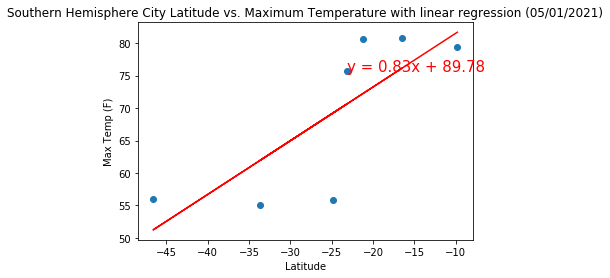

In [14]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title(f"Southern Hemisphere City Latitude vs. Maximum Temperature with linear regression ({date})")
print(linear_reg_plot(x_values,y_values))

The linear regression of this plot shows a strong correlation between latitude and maximum temperatures in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.8027956550293018
None


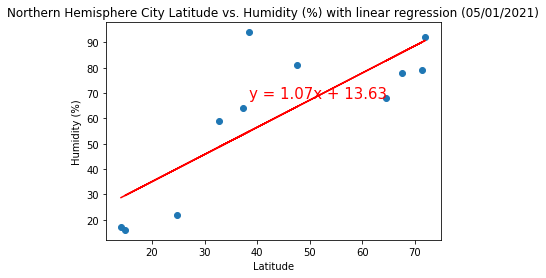

In [15]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere City Latitude vs. Humidity (%) with linear regression ({date})")
print(linear_reg_plot(x_values,y_values))

The linear regression of this plot shows a very weak correlation between latitude and humidity in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.4251361588290856
None


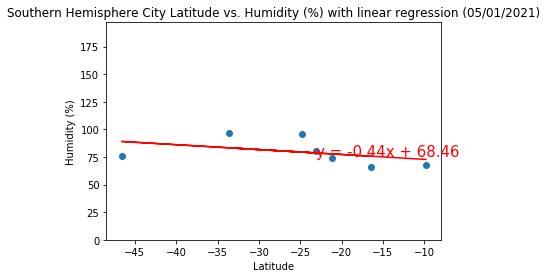

In [16]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere City Latitude vs. Humidity (%) with linear regression ({date})")
print(linear_reg_plot(x_values,y_values))

The linear regression of this plot shows a very weak correlation between latitude and humidity in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.643967114565261
None


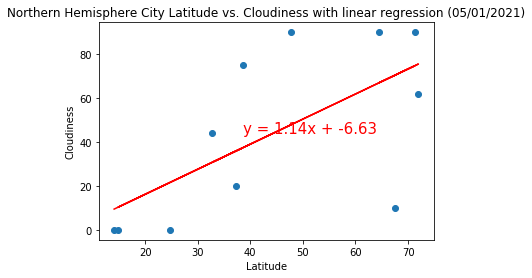

In [17]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness with linear regression ({date})")
print(linear_reg_plot(x_values,y_values))

The linear regression of this plot shows a weak correlation between latitude and cloudiness in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.2086686721127008
None


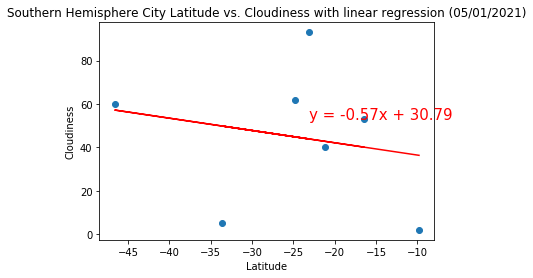

In [18]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness with linear regression ({date})")
print(linear_reg_plot(x_values,y_values))

The linear regression of this plot shows a weak correlation between latitude and cloudiness in the southern hemisphere but stronger than the northern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0639905232442143
None


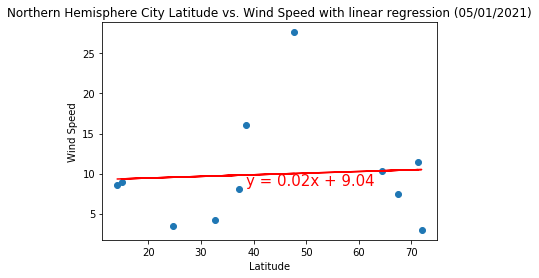

In [19]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed with linear regression ({date})")
print(linear_reg_plot(x_values,y_values))

The linear regression of this plot shows a weak correlation between latitude and wind speed in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2173370802878739
None


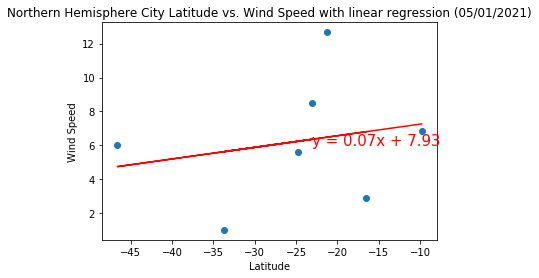

In [20]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed with linear regression ({date})")
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

The linear regression of this plot shows a very weak correlation between latitude and wind speed in the southern hemisphere.